In [1]:
!pip install fredapi

In [2]:
from fredapi import Fred

In [3]:
fred = Fred(api_key='6a6428617d31e4f8c0135c7e97767fa2')

In [4]:
data1 = fred.get_series('PCETRIM12M159SFRBDAL') #FPCPITOTLZGUSA=PCETRIM12M159SFRBDAL=通貨膨脹率

In [5]:
data1 = fred.get_series('PCETRIM12M159SFRBDAL', '03/01/1980')

In [6]:
type(data1)

pandas.core.series.Series

In [7]:
data1

1980-03-01    8.60
1980-04-01    8.55
1980-05-01    8.56
1980-06-01    8.72
1980-07-01    8.60
              ... 
2023-07-01    4.18
2023-08-01    3.88
2023-09-01    3.80
2023-10-01    3.60
2023-11-01    3.41
Length: 525, dtype: float64

<Axes: >

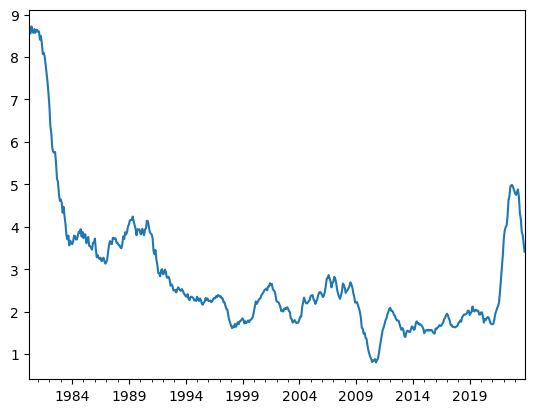

In [8]:
data1.plot()


In [9]:
data2 = fred.get_series('UNRATE')  #unrate=失業率

In [10]:
data2 = fred.get_series('UNRATE', '03/01/1980')

<Axes: >

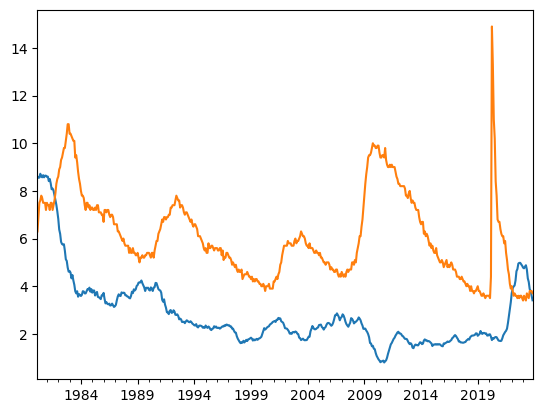

In [11]:
data1.plot()
data2.plot()

In [12]:
df1 = data1.to_frame(name="PCETRIM12M159SFRBDAL")
df2 = data2.to_frame(name="UNRATE")

In [13]:
import pandas as pd
df_merged = pd.concat([df1, df2], axis=1)

In [14]:
import matplotlib
import matplotlib.pyplot as plt


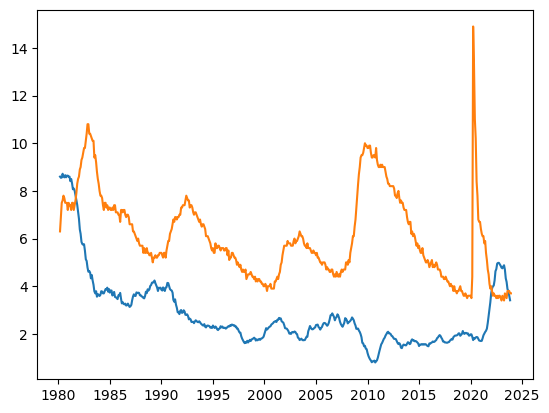

In [15]:
plt.plot(df_merged.index, df_merged["PCETRIM12M159SFRBDAL"])
plt.plot(df_merged.index, df_merged["UNRATE"])


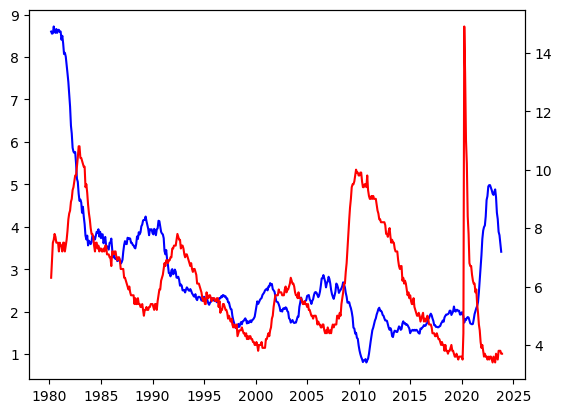

In [16]:
fig,ax = plt.subplots()
ax.plot(df_merged.index, df_merged['PCETRIM12M159SFRBDAL'],color="blue")
ax2=ax.twinx()
ax2.plot(df_merged.index, df_merged['UNRATE'],color="red",)
fig.savefig('折線圖.jpg',format='jpeg')


In [17]:
df_merged.corr()

,PCETRIM12M159SFRBDAL,UNRATE
PCETRIM12M159SFRBDAL,1.000000,0.155494
UNRATE,0.155494,1.000000


<Axes: >

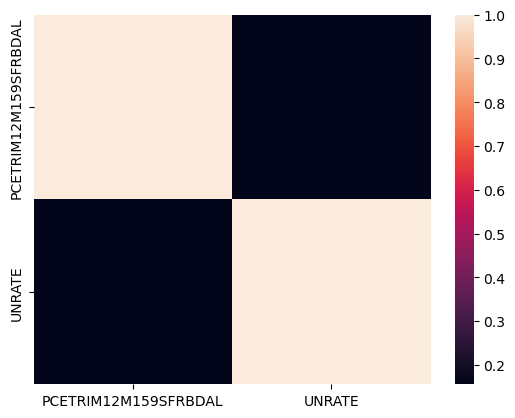

In [18]:
import seaborn as sns
sns.heatmap(df_merged.corr())


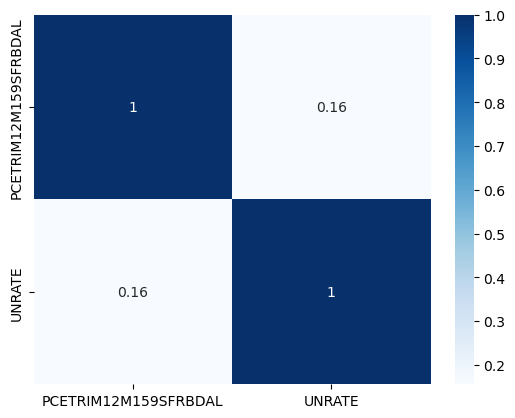

In [19]:
svm = sns.heatmap(df_merged.corr(), cmap="Blues", annot=True)
figure = svm.get_figure()    
figure.savefig('相關係數.png', dpi=400)
